# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from pathlib import Path
from newsapi import NewsApiClient
import nltk
from dotenv import load_dotenv
load_dotenv()



True

In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

newsapi

In [4]:
# Fetch the Bitcoin news articles, print total number of articles, and example headline
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")
print("--------------")
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 8112
--------------


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Adi Robertson',
 'title': 'India will reportedly introduce bill to make owning cryptocurrency illegal',
 'description': 'India’s legislature is reportedly considering a near-total ban on private cryptocurrencies like Bitcoin or Ethereum, including owning the virtual currency. The government has discussed plans for a national digital currency as an alternative.',
 'url': 'https://www.theverge.com/2021/3/15/22332677/india-cryptocurrency-trading-mining-possession-ban-law-report',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/IdgNJaOIQBsN8QbQcH2MDU6sAUA=/0x243:2040x1311/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/10432811/mdoying_180308_2373_0091still.jpg',
 'publishedAt': '2021-03-15T22:25:02Z',
 'content': 'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat…

In [5]:
# Fetch the Ethereum news articles, print total number of articles, and example headline
ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")
print("--------------")
ethereum_headlines["articles"][0]

Total articles about Ethereum: 2179
--------------


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Justine Calma',
 'title': 'The climate controversy swirling around NFTs',
 'description': 'Most NFTs are bought and sold with Ethereum, a cryptocurrency that guzzles up energy and pumps out a lot of greenhouse gas emissions. Artists are fighting over whether there can be a more sustainable future for crypto art.',
 'url': 'https://www.theverge.com/2021/3/15/22328203/nft-cryptoart-ethereum-blockchain-climate-change',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/pYrvxU6TUFVYkAwb6h1U4BPYMj0=/0x431:6000x3572/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22366636/1230723200.jpg',
 'publishedAt': '2021-03-15T13:51:11Z',
 'content': 'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols_b = ["Compound", "Negative", "Neutral", "Positive", "Text"]
bitcoin_df = bitcoin_df[cols_b]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,-0.5106,0.142,0.858,0.000,The hacker behind last years big Twitter hack\...
2,0.6369,0.000,0.887,0.113,Some things are best left a mystery at least a...
3,0.0000,0.000,0.000,0.000,
4,0.8316,0.000,0.754,0.246,TL;DR: Enter the The Complete Bitcoin (BTC) In...


In [7]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass

# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols_e = ["Compound", "Negative", "Neutral", "Positive", "Text"]
ethereum_df = ethereum_df[cols_e]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...
1,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
2,-0.1531,0.062,0.938,0.000,Here's everything you need to know about non-f...
3,0.4767,0.000,0.916,0.084,OpenSea has been one of a handful of NFT marke...
4,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,99.000000,99.000000,99.000000,99.000000
mean,0.035384,0.027242,0.925040,0.037636
std,0.315605,0.056958,0.126153,0.055160
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.901500,0.000000
50%,0.000000,0.000000,0.951000,0.000000
75%,0.102700,0.048000,1.000000,0.073500
max,0.831600,0.326000,1.000000,0.246000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.158699,0.027117,0.908585,0.064287
std,0.400100,0.053667,0.086368,0.073106
min,-0.910000,0.000000,0.664000,0.000000
25%,0.000000,0.000000,0.864500,0.000000
50%,0.051500,0.000000,0.922000,0.049000
75%,0.458800,0.053250,1.000000,0.091000
max,0.877900,0.299000,1.000000,0.256000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [10]:
# For answers to the questions above:  See ReadMe

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Code to download corpora
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lisaesberger/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
all_stopwords = stopwords.words('english')
sw_list = ['char','ha','photo','reuters','us','new','york','wa']
all_stopwords.extend(sw_list)

print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
lemmatizer = WordNetLemmatizer()

btc_token_list = []

for line in bitcoin_df['Text']:
    regex = re.compile("[^a-zA-Z ]")     
    
    re_clean = regex.sub('', line)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in all_stopwords]
    btc_token_list.append(output)       

In [14]:
btc_tokens = []
for item in btc_token_list:
    for z in item:
        btc_tokens.append(z)

print(btc_tokens)

['one', 'strictest', 'crackdown', 'worldwidephoto', 'michele', 'doying', 'vergeindia', 'reportedly', 'moving', 'forward', 'sweeping', 'ban', 'cryptocurrencies', 'according', 'country', 'legislat', 'hacker', 'behind', 'last', 'year', 'big', 'twitter', 'hack', 'sentenced', 'hard', 'timegraham', 'ivan', 'clark', 'teenage', 'hacker', 'broke', 'twitters', 'system', 'took', 'verified', 'account', 'used', 'thing', 'best', 'left', 'mystery', 'least', 'far', 'coinbase', 'concernedthe', 'san', 'franciscobased', 'cryptocurrency', 'exchange', 'preparing', 'go', 'public', 'since', 'last', 'year', 'thursday', 'pro', 'tldr', 'enter', 'complete', 'bitcoin', 'btc', 'investment', 'giveaway', 'chance', 'win', 'cryptocurrencyrelated', 'prizesthe', 'bitcoin', 'investment', 'giveaway', 'includes', 'everything', 'need', 'get', 'proposed', 'law', 'india', 'would', 'make', 'crime', 'mine', 'trade', 'even', 'hold', 'cryptocurrencies', 'like', 'bitcoin', 'country', 'according', 'report', 'citing', 'senior', 'gov

In [15]:
eth_token_list = []

for line_e in ethereum_df['Text']:
    regex_e = re.compile("[^a-zA-Z ]")     
    
    re_clean_e = regex_e.sub('', line_e)
    words_e = word_tokenize(re_clean_e)
    lem_e = [lemmatizer.lemmatize(word_e) for word_e in words_e]
    output_e = [word_e.lower() for word_e in lem_e if word_e.lower() not in all_stopwords]
    eth_token_list.append(output_e)   

In [16]:
# Create a new tokens column for ethereum
eth_tokens = []
for item_e in eth_token_list:
    for z_e in item_e:
        eth_tokens.append(z_e)

print(eth_tokens)

['famed', 'auction', 'house', 'christies', 'sold', 'first', 'purely', 'digital', 'piece', 'art', 'whopping', 'million', 'price', 'buyer', 'got', 'digital', 'file', 'collage', 'image', 'complex', 'legac', 'one', 'strictest', 'crackdown', 'worldwidephoto', 'michele', 'doying', 'vergeindia', 'reportedly', 'moving', 'forward', 'sweeping', 'ban', 'cryptocurrencies', 'according', 'country', 'legislat', 'heres', 'everything', 'need', 'know', 'nonfungible', 'token', 'latest', 'cryptocurrency', 'crazeread', 'full', 'story', 'learn', 'even', 'nfts', 'opensea', 'one', 'handful', 'nft', 'marketplace', 'explode', 'popularity', 'recent', 'week', 'collector', 'wade', 'trading', 'nonfungible', 'token', 'blockchain', 'startup', 'nfts', 'latest', 'cryptocurrency', 'rage', 'day', 'band', 'like', 'kings', 'leon', 'releasing', 'next', 'album', 'limited', 'edition', 'golden', 'ticket', 'nba', 'digital', 'collectible', 'sold', 'million', 'nfts', 'nonfungible', 'token', 'scarce', 'digital', 'content', 'repres

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_tokens, n=2))
print(dict(btc_bigram_counts))

{('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'hacker'): 1, ('hacker', 'behind'): 1, ('behind', 'last'): 1, ('last', 'year'): 2, ('year', 'big'): 1, ('big', 'twitter'): 1, ('twitter', 'hack'): 1, ('hack', 'sentenced'): 1, ('sentenced', 'hard'): 1, ('hard', 'timegraham'): 1, ('timegraham', 'ivan'): 1, ('ivan', 'clark'): 1, ('clark', 'teenage'): 1, ('teenage', 'hacker'): 1, ('hacker', 'broke'): 1, ('broke', 'twitters'): 1, ('twitters', 'system'): 1, ('system', 'took'): 1, ('took', 'verified'): 1, ('verified', 'account'): 1, ('account', 'used'): 1, ('used', 'thing'): 1, ('thing', 

In [19]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_tokens, n=2))
print(dict(eth_bigram_counts))

{('famed', 'auction'): 1, ('auction', 'house'): 2, ('house', 'christies'): 1, ('christies', 'sold'): 1, ('sold', 'first'): 1, ('first', 'purely'): 1, ('purely', 'digital'): 1, ('digital', 'piece'): 1, ('piece', 'art'): 1, ('art', 'whopping'): 1, ('whopping', 'million'): 1, ('million', 'price'): 1, ('price', 'buyer'): 1, ('buyer', 'got'): 1, ('got', 'digital'): 1, ('digital', 'file'): 1, ('file', 'collage'): 1, ('collage', 'image'): 1, ('image', 'complex'): 1, ('complex', 'legac'): 1, ('legac', 'one'): 1, ('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'heres'): 1, ('heres', 'every

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
btc_counts = Counter(ngrams(btc_tokens, n=1))

btc_top_10 = token_count(btc_counts)
btc_top_10

[(('bitcoin',), 74),
 (('currency',), 25),
 (('taken',), 23),
 (('stafffile',), 22),
 (('virtual',), 22),
 (('illustration',), 22),
 (('seen',), 18),
 (('cryptocurrency',), 16),
 (('reutersdado',), 16),
 (('representation',), 15)]

In [22]:
# Get the top 10 words for Ethereum
eth_counts = Counter(ngrams(eth_tokens, n=1))

eth_top_10 = token_count(eth_counts)
eth_top_10

[(('bitcoin',), 26),
 (('cryptocurrency',), 24),
 (('ethereum',), 19),
 (('digital',), 16),
 (('token',), 15),
 (('nfts',), 15),
 (('nft',), 13),
 (('million',), 11),
 (('nonfungible',), 11),
 (('one',), 10)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

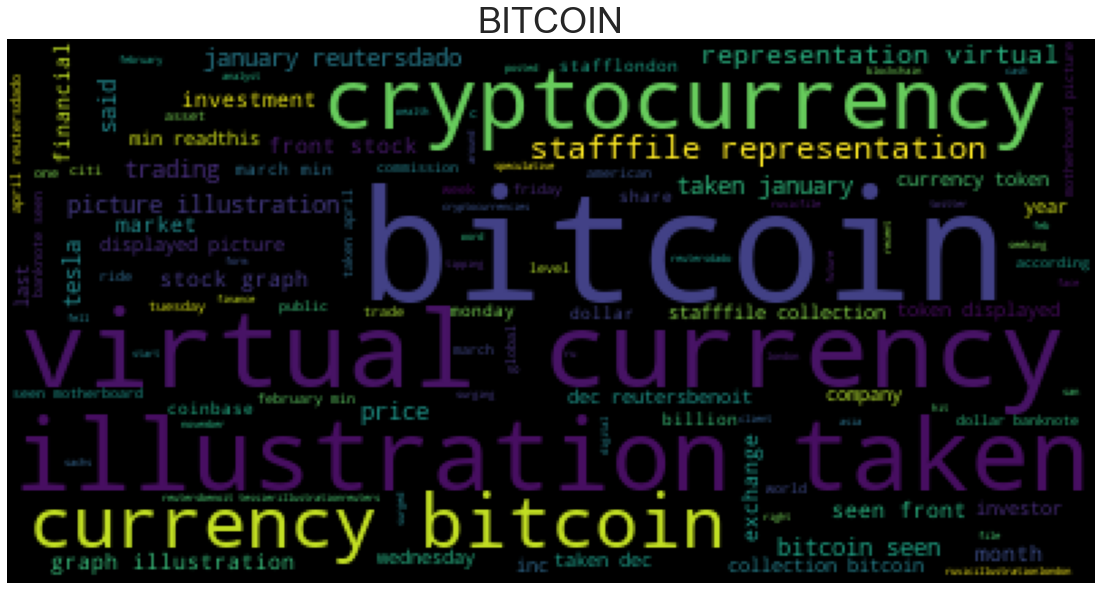

In [24]:
# Generate the Bitcoin word cloud
btc_big_string = ' '.join(btc_tokens)
btc_wc = WordCloud().generate(btc_big_string)

plt.imshow(btc_wc)
plt.axis("off")
plt.title("BITCOIN", size=36)
plt.show()

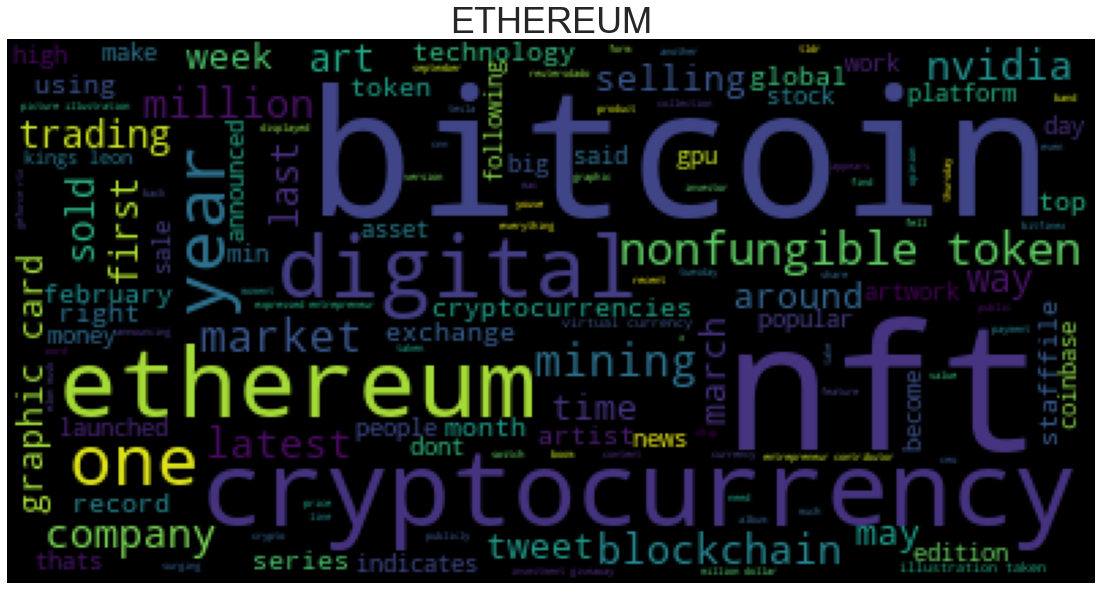

In [25]:
# Generate the Bitcoin word cloud
eth_big_string = ' '.join(eth_tokens)
eth_wc = WordCloud().generate(eth_big_string)

plt.imshow(eth_wc)
plt.axis("off")
plt.title("ETHEREUM", size=36)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Add a title to the document
btc_token_ner = []
btc_title = '---------------------------------- THE EXPLODING WORLD OF BITCOIN ----------------------------------'
btc_token_ner.append(btc_title)

for line in bitcoin_df['Text']:
    btc_token_ner.append(line)   

In [30]:
# Concatenate all of the bitcoin text together
btc_concat = ' '.join(btc_token_ner)

In [31]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_concat)

In [32]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [33]:
# List all Entities
btc_entities = [ent.text for ent in btc_ner.ents if ent.label_ in ['GPE', 'ORG']]

In [34]:
btc_entities

['India',
 'Reuters',
 'Twitter',
 'Coinbase',
 'San Francisco',
 'the The Complete Bitcoin',
 'BTC',
 'India',
 'Reuters',
 'New York',
 'CNN',
 'Reuters',
 'REUTERS/Benoit Tessier/Illustration',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'REUTERS/',
 'Reuters',
 'Reuters',
 'Pristina',
 'Kosovo',
 'HONG KONG',
 'Reuters Breakingviews',
 'Reuters',
 'Bitcoin',
 'U.S.',
 'Reuters',
 'Bitcoin',
 'U.S.',
 'REUTERS/',
 'Bitcoin',
 'KTS Design/Science Photo Library',
 'The Chicago Board Options Exchange',
 'the US Securities and Exchange Commission',
 'Gab',
 'San Francisco',
 'Reuters',
 'REUTERS/Benoit Tessier/Illustration',
 'Reuters',
 'Bitcoin',
 'Reuters',
 'REUTERS/Benoit Tessier/Illustration',
 'Reuters',
 'Bitcoin',
 'Reuters',
 'REUTERS/Benoit Tessier/Illustration/File Photo',
 'Reuters',
 'Reuters',
 'Bitcoin',
 'REUTERS/',
 'bitcoin',
 'Reuters',
 'Bitcoin',
 'Noted Bitcoin',
 'Reuters',
 'Bitcoin',
 'REUTERS/',
 'Reuters',
 'Reuters',
 'Reuters',
 'CBOE',
 'the U.S. Securities and E

In [35]:
entities_df = pd.DataFrame(columns=['Bitcoin'])

---

In [36]:
btc_entities_no_duplicates = [] 
for x in btc_entities:
    if x not in btc_entities_no_duplicates:
        btc_entities_no_duplicates.append(x)

In [62]:
btc_entities_no_duplicates

['India',
 'Reuters',
 'Twitter',
 'Coinbase',
 'San Francisco',
 'the The Complete Bitcoin',
 'BTC',
 'New York',
 'CNN',
 'REUTERS/Benoit Tessier/Illustration',
 'Bitcoin',
 'REUTERS/',
 'Pristina',
 'Kosovo',
 'HONG KONG',
 'Reuters Breakingviews',
 'U.S.',
 'KTS Design/Science Photo Library',
 'The Chicago Board Options Exchange',
 'the US Securities and Exchange Commission',
 'Gab',
 'REUTERS/Benoit Tessier/Illustration/File Photo',
 'bitcoin',
 'Noted Bitcoin',
 'CBOE',
 'the U.S. Securities and Exchange Commission',
 'SEC',
 'Exchange Traded Fund',
 'ETF',
 'White House',
 'the White House',
 'Washington',
 'NEW YORK',
 'Morgan Stanley',
 'San Diego',
 'California',
 'NEW YORK/LONDON',
 'the Wall Street Journal',
 'the Commodity Futures Trading Commission',
 'LONDON',
 'REUTERS/Benoit Tessier/Illustration/File Photo\r\n',
 'Chesnot/Getty Images',
 'Tesla Inc',
 'MicroStrategy Inc',
 'REUTERS',
 'the Indian Institute of Technology',
 'IIT',
 'New Delhi',
 'REUTERS/Anushree Fadnav

## Ethereum NER

In [38]:
# Add a title to the document
eth_token_ner = []
eth_title = '------------------------------ THE ENCHANTING UNIVERSE OF ETHEREUM ------------------------------'
eth_token_ner.append(eth_title)

for line in ethereum_df['Text']:
    eth_token_ner.append(line)   

In [39]:
# Concatenate all of the ethereum text together
eth_concat = ' '.join(eth_token_ner)

In [40]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_concat)


In [41]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [42]:
# List all Entities
eth_entities = [ent.text for ent in eth_ner.ents if ent.label_ in ['GPE', 'ORG']]

In [43]:
print(eth_entities)

['Christies', 'India', 'Reuters', 'OpenSea', 'NFT', 'NBA', 'Ethereum', 'San Francisco', 'Reuters', 'Hong Kong', 'China', 'HONG KONG', 'Reuters', 'app', 'the The Complete Bitcoin', 'BTC', 'Reuters', 'Reuters', 'Bitcoin', 'Reuters', 'SINGAPORE', 'Reuters', 'India', 'Reuters', 'PC Watch', 'Digital', 'Grayscale Investments', 'NEW YORK/LONDON', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin', 'REUTERS/', 'Reuters', 'REUTERS/Benoit Tessier/Illustration', 'Reuters', 'Bitcoin', 'Reuters', 'Bitcoin', 'REUTERS/', 'Dado Ruvic/File Photo', 'Reuters', 'REUTERS/Benoit Tessier/Illustration', 'Reuters', 'Bitcoin', 'U.S.', 'The Complete Bitcoin Investment Giveaway', 'New York', 'CNN', 'AI', 'Coinbase', 'Nvidia', 'HomeChevron', 'DeFi', 'The Post of his dank', 'NFT', 'NFT', 'Bitfinex cryptocurrency exchange', 'REUTERS/Dado Ruvic/Illustration', 'Reuters', 'AI', 'Elon Musk', 'Elon Musks', 'NFT', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'NFT', 'Bitcoin', 'Bitcoin', 'Bitcoin', 'BANGKOK', 'Galois, Supranational', 'The Eth

In [44]:
eth_entities_no_duplicates = [] 
for x in eth_entities:
    if x not in eth_entities_no_duplicates:
        eth_entities_no_duplicates.append(x)

In [61]:
eth_entities_no_duplicates

['Christies',
 'India',
 'Reuters',
 'OpenSea',
 'NFT',
 'NBA',
 'Ethereum',
 'San Francisco',
 'Hong Kong',
 'China',
 'HONG KONG',
 'app',
 'the The Complete Bitcoin',
 'BTC',
 'Bitcoin',
 'SINGAPORE',
 'PC Watch',
 'Digital',
 'Grayscale Investments',
 'NEW YORK/LONDON',
 'REUTERS/',
 'REUTERS/Benoit Tessier/Illustration',
 'Dado Ruvic/File Photo',
 'U.S.',
 'The Complete Bitcoin Investment Giveaway',
 'New York',
 'CNN',
 'AI',
 'Coinbase',
 'Nvidia',
 'HomeChevron',
 'DeFi',
 'The Post of his dank',
 'Bitfinex cryptocurrency exchange',
 'REUTERS/Dado Ruvic/Illustration',
 'Elon Musk',
 'Elon Musks',
 'BANGKOK',
 'Galois, Supranational',
 'The Ethereum Foundation',
 'the Tampa Bay Buccaneers',
 'Bitcoin Worth',
 'Bitcoins',
 'NFL',
 'Beastly Ballers',
 'Kings of Leon',
 "Christie's",
 'Beeple',
 'the GeForce RTX 3060',
 'NVIDIA',
 'pri',
 'bitcoin',
 'Twitter',
 'Square \r\n SQ',
 "CNN Business'",
 'Bell',
 'London',
 'Techmeme',
 'AMD',
 'Ijon Inton',
 'Cabanatuan City',
 'Manila'